<a href="https://colab.research.google.com/github/mcd-unison/material-programacion/blob/main/intro-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>


# Curso Propedéutico en *Programación*

# Analizando un conjunto de datos con Pandas:
# Egresos Hospitalarios de la [Secreteria de Salud](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html)


**Feliciano Robles Andrade**


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import zipfile
import urllib.request
import zipfile
url = 'http://www.dgis.salud.gob.mx/descargas/datosabiertos/recursosSalud/Recursos_Secretaria_Salud_2023.zip?V=2024.04.30'

#filename = 'filename.zip'

#urllib.request.urlretrieve(url, filename)
#with zipfile.ZipFile(filename, 'r') as zip_ref:
#    zip_ref.extractall('.')

In [ ]:
# Consultamos el csv de interes
# descriptores_url = "http://www.dgis.salud.gob.mx/descargas/datosabiertos/recursosSalud/Descriptores_Recursos.xlsx?V=1.1"
# df_des = pd.read_excel(descriptores_url)
# De este excel pudimos discriminar los datos clave de interes (aquellos que inicien dentro del rango "E13-E25" y "C1706-C1750")

In [15]:
url='https://raw.githubusercontent.com/FelicianoRoblesAndrade/Python/main/sec_sal.csv' # La pagina oficial empezo a fallar, asi que saque de github los datos
# local="/content/Recursos Secretaria de Salud 2023.csv"
df_o=pd.read_csv(url, engine="python",encoding='latin-1')
df_o.info() # Vemos la informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Columns: 146 entries, CLUES to C1750
dtypes: int64(138), object(8)
memory usage: 15.6+ MB


In [16]:
df_o.head()

,CLUES,CLAVE ENTIDAD,ENTIDAD,CLAVE JURISDICCIÓN,JURISDICCIÓN,CLAVE MUNICIPIO,MUNICIPIO,CLAVE LOCALIDAD,LOCALIDAD,TIPO DE ESTABLECIMIENTO,...,C1725,C1729,C1735,C1738,C1745,C1746,C1747,C1749,C1730,C1750
0,ASSSA000013,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,CE,...,0,0,0,0,0,0,0,0,0,2023
1,ASSSA000066,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,CE,...,0,0,0,0,0,0,0,0,0,2023
2,ASSSA000071,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,CE,...,0,0,0,0,0,0,0,0,0,2023
3,ASSSA000083,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,CE,...,0,0,0,0,0,0,0,0,0,2023
4,ASSSA000095,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,CE,...,0,0,0,0,0,0,0,0,0,2023


Esta base de datos en la pagina tiene un archivo excel donde se explica que significa cada uno de los codigos de las columnas, despues de analizar las columnas se llego a la conclusion que las mas relevantes que se buscan utilizar, serian: (**E13**=total_consultorios,**E18**=medicos_generales_especialistas_y_odontologos,**E19**=personal_medico_en_adiestramiento, **E23**=otro_personal_profesional,**E24**=personal_tecnico,**E25**=otro_personal) y valores especiales como lo son: (**C1750**=cuenta_con_banco_de_sangre), siendo el valor de casi todos numeros, con excepcion de **C1750**, cuyo valor es binario (1=Si, 0=No), ademas de las columnas principales de entidad y nombre de consultorio

In [131]:
df_1=df_o[['ENTIDAD','NOMBRE DEL ESTABLECIMIENTO',"E13",'E18','E19','E23','E24','E25','C1706']] # De todos
df_1=df_1.rename(columns={'ENTIDAD':'entidad','NOMBRE DEL ESTABLECIMIENTO':'nombre', 'E13':'con','E18':'med','E19':'mad','E23':'pro','E24':'tec','E25':'otr','C1706':'bnk'})
df_1.head()

,entidad,nombre,con,med,mad,pro,tec,otr,bnk
0,AGUASCALIENTES,CENTRO ESTATAL DE SALUD MENTAL FAMILIAR AGUA C...,14,0,0,116,2,42,0
1,AGUASCALIENTES,CENTRO DE SALUD URBANO NORIAS DE OJOCALIENTE,3,3,1,1,1,4,0
2,AGUASCALIENTES,CENTRO DE SALUD URBANO GREMIAL,7,7,0,2,3,5,0
3,AGUASCALIENTES,CENTRO DE SALUD URBANO PROGRESO,4,6,1,0,4,7,0
4,AGUASCALIENTES,CENTRO DE SALUD URBANO CONSTITUCION,7,11,2,2,3,7,0


In [132]:
df=df_1.groupby(['entidad'])[['con','med','mad','pro','tec','otr']].mean()
df=df.reset_index()
print('Se encuentran todas las entidades de Mexico registradas') if len(df)==32 else ()

Se encuentran todas las entidades de Mexico registradas


In [133]:
df.head() # El promedio de los datos en cada estado

,entidad,con,med,mad,pro,tec,otr
0,AGUASCALIENTES,4.594828,9.887931,3.801724,4.284483,3.370690,13.879310
1,BAJA CALIFORNIA,3.888889,6.206349,4.169312,1.714286,1.962963,8.767196
2,BAJA CALIFORNIA SUR,3.152941,6.235294,3.494118,1.964706,2.447059,8.988235
3,CAMPECHE,3.314516,7.483871,1.862903,3.250000,2.072581,7.895161
4,CHIAPAS,2.370714,4.054680,1.134384,1.508804,1.781279,4.884152


In [28]:
for i in range(len(df)):
  for i2 in df:
    if df[i2][i]==df[i2].max():
        if i2=="entidad":
          continue
        else:
          print(f'Estado con mayor(es) {i2}:\n{df["entidad"][i]}\n')
    if df[i2][i]==df[i2].min():
        if i2=="entidad":
          continue
        else:
          print(f'Estado con menor(es) {i2}:\n{df["entidad"][i]}\n')

Estado con mayor(es) con:
CIUDAD DE MEXICO

Estado con mayor(es) med:
CIUDAD DE MEXICO

Estado con mayor(es) mad:
CIUDAD DE MEXICO

Estado con mayor(es) pro:
CIUDAD DE MEXICO

Estado con mayor(es) tec:
CIUDAD DE MEXICO

Estado con mayor(es) otr:
CIUDAD DE MEXICO

Estado con menor(es) con:
GUERRERO

Estado con menor(es) mad:
GUERRERO

Estado con menor(es) med:
NUEVO LEON

Estado con menor(es) pro:
OAXACA

Estado con menor(es) otr:
SAN LUIS POTOSI

Estado con menor(es) tec:
TLAXCALA



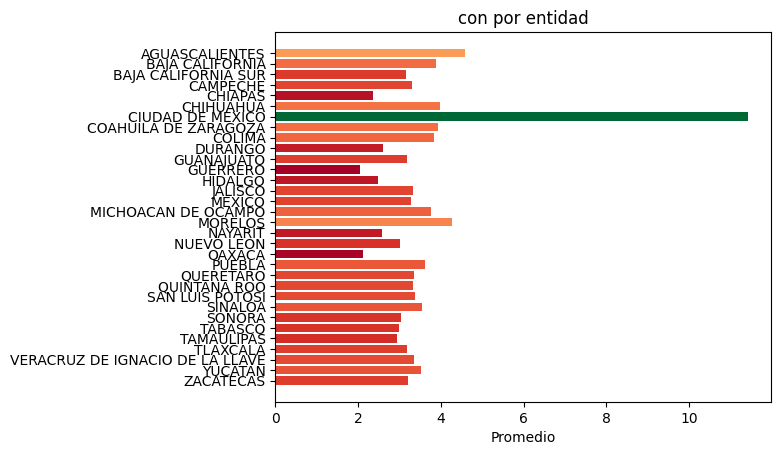

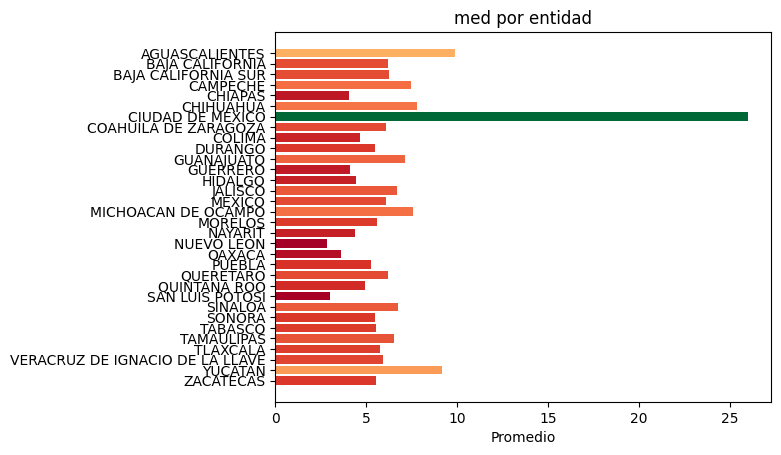

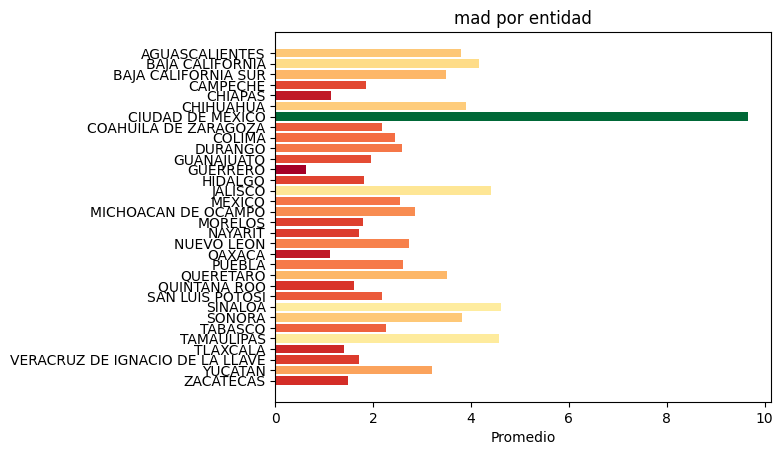

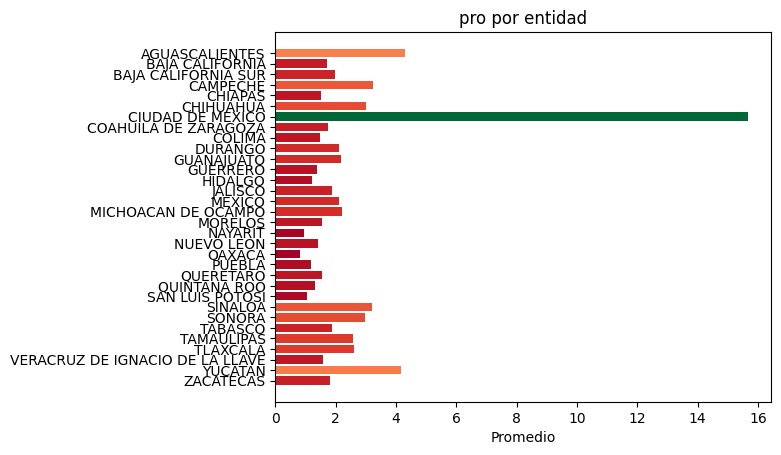

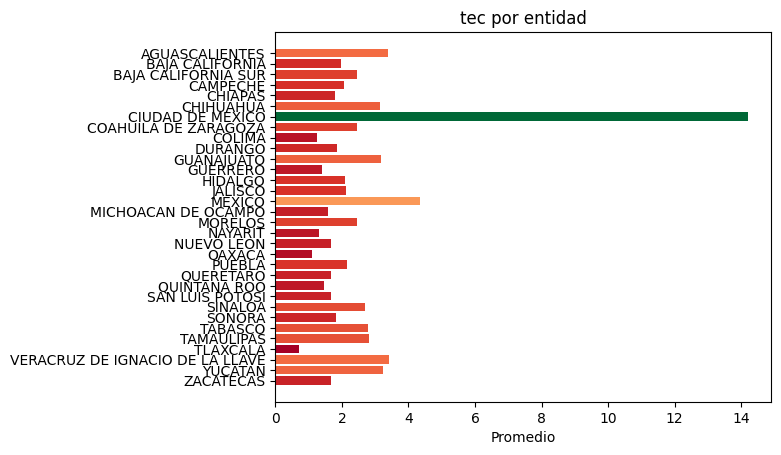

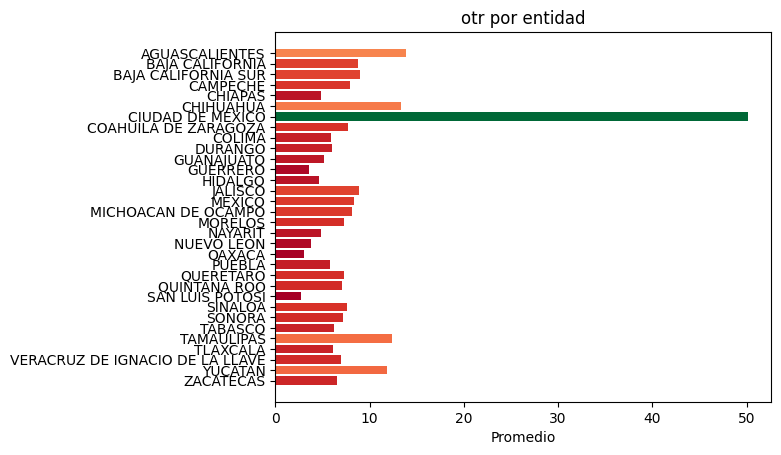

In [118]:
a='entidad'
x=df[a][:]
for i in df:
  if i==a:
    continue
  else:
    b=i
    y=df[b][:]
    y_pos = np.arange(len(x))
    error = np.random.rand(len(x))
    fig, ax = plt.subplots()
    cmap = plt.cm.get_cmap('RdYlGn')
    norm = mcolors.Normalize(min(y), max(y))
    colors = [cmap(norm(u)) for u in y]
    ax.barh(y_pos, y, color=colors)
    ax.set_yticks(y_pos, labels=x)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Promedio')
    ax.set_title(f'{b} por entidad')
    plt.show()

In [149]:
df=df_1 # Recuperamos el dataframe original
df=df[df['entidad'] == "SONORA"] # Sacamos todos los datos de Sonora
df=df.drop('entidad',axis=1) # Como todos los datos son de Sonora, no necesitamos la columna de entidad
df.describe()

,con,med,mad,pro,tec,otr,bnk
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,3.032698,5.457766,3.820163,2.956403,1.811989,7.182561,0.029973
std,6.041660,24.302347,27.097281,13.243753,6.357309,35.117864,0.170745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,55.000000,252.000000,401.000000,142.000000,60.000000,422.000000,1.000000
